<a href="https://colab.research.google.com/github/ROstapch/DataAnalysis/blob/main/mpg_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())
worksheet = gc.open('carmpg.csv').sheet1

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()
headers = rows[0]
del rows[0]



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pandas.api.types import is_string_dtype
from pandas.api.types import is_object_dtype
from pandas.api.types import is_numeric_dtype

#rows to DataFrame
mpg_data = pd.DataFrame(rows, columns = headers)

#mpg_data.drop('cylinders', axis=1, inplace=True)
mpg_data.drop('model year', axis='columns', inplace=True)
mpg_data.drop('origin', axis='columns', inplace=True)
mpg_data.drop('car name', axis='columns', inplace=True)

#cleaning data and convering it to numeric type
for column in mpg_data:
  mpg_data[column] = pd.to_numeric(mpg_data[column].astype(str).str.replace(',',''), errors='coerce')#.fillna(0).astype(int)
mpg_data = mpg_data.dropna()
mpg_data.reset_index(drop=True)

#data output
mpg_data

,mpg,cylinders,displacement,horsepower,weight,acceleration
0,18.0,8,307.0,130.0,3504,12.0
1,15.0,8,350.0,165.0,3693,11.5
2,18.0,8,318.0,150.0,3436,11.0
3,16.0,8,304.0,150.0,3433,12.0
4,17.0,8,302.0,140.0,3449,10.5
...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6
394,44.0,4,97.0,52.0,2130,24.6
395,32.0,4,135.0,84.0,2295,11.6
396,28.0,4,120.0,79.0,2625,18.6


**All data correlations using pandas**



In [ ]:
print(np.round(mpg_data.corr(), 3))

                mpg  cylinders  displacement  horsepower  weight  acceleration
mpg           1.000     -0.778        -0.805      -0.778  -0.832         0.423
cylinders    -0.778      1.000         0.951       0.843   0.898        -0.505
displacement -0.805      0.951         1.000       0.897   0.933        -0.544
horsepower   -0.778      0.843         0.897       1.000   0.865        -0.689
weight       -0.832      0.898         0.933       0.865   1.000        -0.417
acceleration  0.423     -0.505        -0.544      -0.689  -0.417         1.000


**All data scatter plots with histograms on axis **



In [ ]:

def k_dim_plot(data, regress = False):
    fig, axs = plt.subplots(len(data.columns), len(data.columns), figsize=(40, 40))

    for column, column_name in enumerate(data.columns):
        for row, row_name in enumerate(data.columns):
            if column == row:
                axs[column, row].hist(data[column_name], density = True, color = '#658fa3')
                axs[column, row].set_title(column_name)
            else:
                axs[column, row].scatter(data[column_name], data[row_name])
                axs[column, row].set_title(column_name + " - " + row_name)
                        
    plt.show()
    
#k_dim_plot(mpg_data)

**Counting density and cdf for numeric dataframe column [ with amount of bims set ]**




In [ ]:
data = mpg_data[['mpg','weight']].copy()



def density(data, bins=None):
    if (not (data.empty) and is_numeric_dtype(data)):
        if (bins == None):
            bins = np.round(np.sqrt(len(data.dropna())))
        step = (data.max() - data.min()) / bins
        
        bins_values = []
        counts = []
        sorted_data = data.sort_values().reset_index(drop=True)
        
        j = freq = low = 0
        for i in range(int(bins)):
            freq = 0
            low = i * step + data.min()
            
            while j < sorted_data.count() and sorted_data[j] <= low + step:
                if (sorted_data[j] <= low + step):
                    freq += 1
                elif (i == int(bins)):
                    freq += 1
                j += 1
            freq = freq / data.count()
            bins_values.append(np.round(low, 2))
            counts.append(freq)
        bins_values.append(np.round(low + step, 2))
        return (counts, bins_values)
    else:
        return (None, None)
    
    
def cdf(data, bins = None): #cumulative distribution function
    counts, bins_values = density(data, bins)
    cumulative_dis = [0]
    temp = 0.0

    if (cumulative_dis != None and bins != None):
        for count in counts:
            temp = temp + count
            cumulative_dis = np.append(cumulative_dis, temp)
        #cumulative_dis = np.append(cumulative_dis, 1)
        return (cumulative_dis, bins_values)
    else:
        return (None, None)
    

**Basic evaluations for k-dimentional arrays, represented as pandas DataFrame**
* minimum
* maximum
* mean
* mode
* median
* standart deviation


In [ ]:

def evaluations_k(data):
    df = pd.DataFrame(index = ['min', 'max', 'mean', 'mode', 'median', 'standart deviation'])

    for column in data.columns:
        minimum = np.round(data[column].min(), 3)
        maximum = np.round(data[column].max(), 3)
        mean = np.round(data[column].mean(), 3)
        mode = np.round(data[column].mode().iloc[0], 3)
        median = np.round(data[column].median(), 3)
        std = np.round(data[column].std(), 3)

        df[column] = [minimum, maximum, mean, mode, median, std]

    return (df)

print (evaluations_k(data))


                       mpg    weight
min                  9.000  1613.000
max                 46.600  5140.000
mean                23.446  2977.584
mode                13.000  1985.000
median              22.750  2803.500
standart deviation   7.805   849.403


**Scatter plot and 2d-histogram for 2dimentional data**

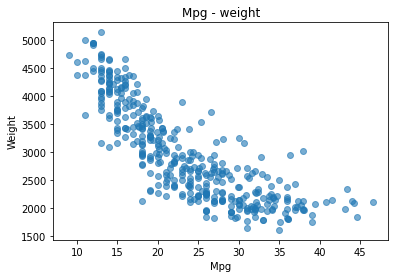

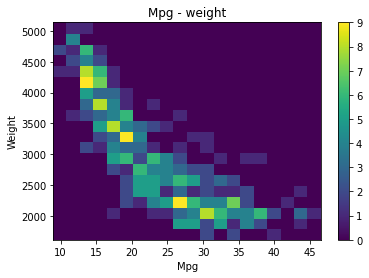

In [ ]:
import matplotlib.colors as mpcolors

plt.scatter(data['mpg'], data['weight'], alpha = 0.6)
plt.title('Mpg - weight')
plt.xlabel('Mpg')
plt.ylabel('Weight')

plt.show()


h = plt.hist2d(data['mpg'], data['weight'], bins=20, norm=mpcolors.PowerNorm(1))
plt.title('Mpg - weight')
plt.xlabel('Mpg')
plt.ylabel('Weight')
plt.colorbar(h[3])

plt.show()

**Plotting density and cumulative distribution function with histogram for 1d data**



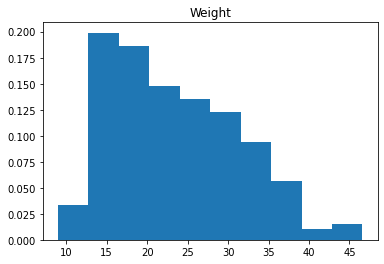

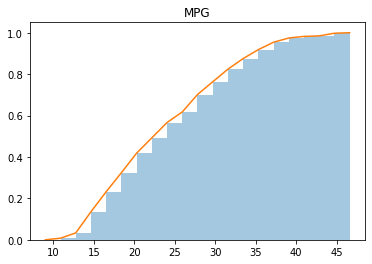

In [ ]:
counts, bins = density(data['mpg'], bins = 10)
plt.hist(bins[:-1], bins, weights=counts)
plt.title("Weight") 
plt.show()

counts, bins = cdf(data['mpg'], bins = 20)
plt.hist(bins[:-1], bins, weights=counts[:-1], alpha=0.4)
plt.plot(bins, counts)
plt.title("MPG") 
plt.show()

**Linear regression**

regression is a function of type:  "y = a + b*x"


linregress return next data
* Slope of the regression line.
* Intercept of the regression line with oy.
* Correlation coefficient.
* Two-sided p-value for a hypothesis test whose null hypothesis is that the slope is zero, using Wald Test with t-distribution of the test statistic.
* Standard error of the estimated gradient.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

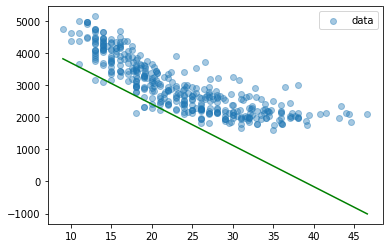

In [ ]:
from scipy import stats


slope, intercept, corr, p_value, std_err = stats.linregress(mpg_data.acceleration, mpg_data.weight)
temp = {'slope': slope, 'intercept x = 0': intercept, 'correlation': corr, 'p_value': p_value, 'std_error': std_err}

plt.scatter(data['mpg'], data['weight'], alpha = 0.4, label='data')
#plt.plot(data['mpg'], intercept + slope*data['mpg'], 'r', label='regression')
plt.plot([data['mpg'].min(), data['mpg'].max()], [intercept + slope*data['mpg'].min(), intercept + slope*data['mpg'].max()], 'g')
plt.legend()
plt.show()

#print (temp)

Plotting exponential regression using scipy

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html#scipy.optimize.curve_fit


It requires us knowing the model of regression. So it needs some additional criterias to determin correct model, if it's possible at all.

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:726: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


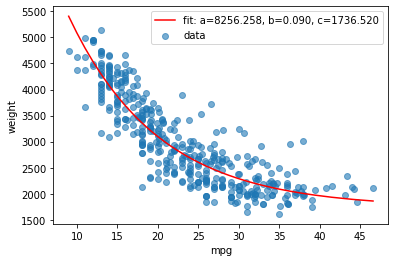

In [ ]:
from scipy.optimize import curve_fit


def func_exp(x, a, b, c):
    return (a * np.exp(-b * x) + c)

def func_sqrt(x, a, b, c):
    return (a * np.sqrt(b*x) + c)


def regress_plot(x , y, regr_func):
    if (not (x.empty) and not (y.empty)):
        div = np.sqrt(x.max())
        xdata = (x / div).sort_values()
        
        popt, pcov = curve_fit(regr_func, x / div, y / div)
        popt[0] = popt[0] * div
        popt[2] = popt[2] * div
        fx = []
        for value in xdata:
            fx.append(regr_func(value, *popt))
        return (xdata * div, fx, popt)
    return (None)


xdata = data['mpg'].sort_values()
ydata = data['weight'].sort_values()

plt.scatter(data['mpg'], data['weight'], alpha = 0.6, label='data')


popt, pcov = curve_fit(func_exp, data['mpg'], data['weight']) #getting the correct parameters for regression
plt.plot(xdata, func_exp(xdata, *popt), 'r-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))


plt.xlabel('mpg')
plt.ylabel('weight')
plt.legend()

plt.show()

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:726: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:726: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


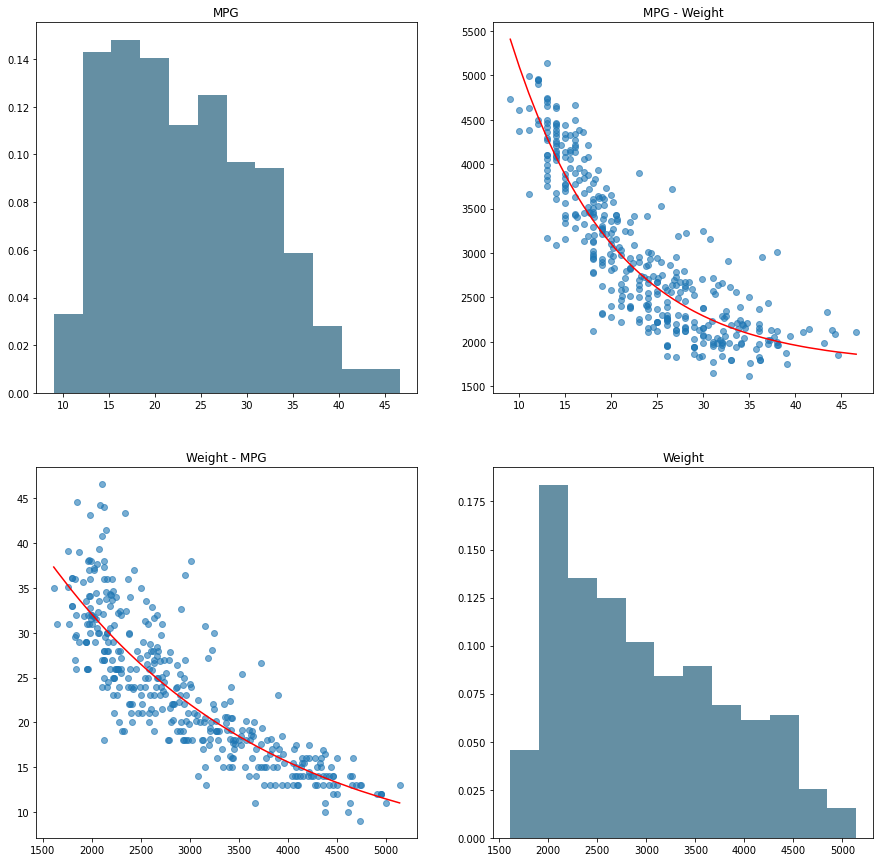

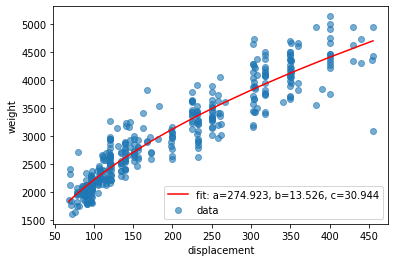

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

######
counts, bins = density(data['mpg'], bins = 12)
axs[0, 0].hist(bins[:-1], bins, weights=counts, color = '#658fa3')
axs[0, 0].set_title("MPG")

######
counts, bins = density(data['weight'], bins = 12)
axs[1, 1].hist(bins[:-1], bins, weights=counts, color = '#658fa3')
axs[1, 1].set_title("Weight")



######
x, fx, popt = regress_plot(data['mpg'], data['weight'], func_exp)

axs[0, 1].scatter(data['mpg'], data['weight'], alpha = 0.6, label='data')
axs[0, 1].plot(x , fx, 'r-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
axs[0, 1].set_title("MPG - Weight")


######
x, fx, popt = regress_plot(data['weight'], data['mpg'], func_exp)

axs[1, 0].scatter(data['weight'], data['mpg'], alpha = 0.6, label='data')
axs[1, 0].plot(x , fx, 'r-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
axs[1, 0].set_title("Weight - MPG")


plt.show()




#Plotting square root regression type
x, fx, popt = regress_plot(mpg_data['displacement'], data['weight'], func_sqrt)

plt.scatter(mpg_data['displacement'], data['weight'], alpha = 0.6, label='data')
plt.plot(x , fx, 'r-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

plt.xlabel('displacement')
plt.ylabel('weight')
plt.legend()

plt.show()

**Building regression function using Sklearn library**

This code provides polinomial kernel regression 

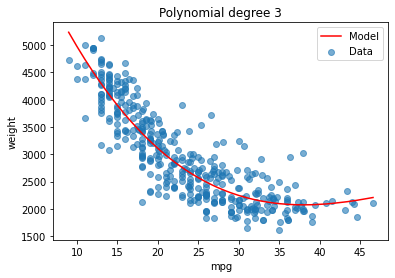

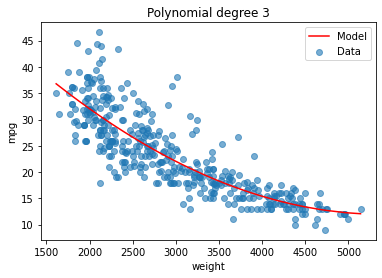

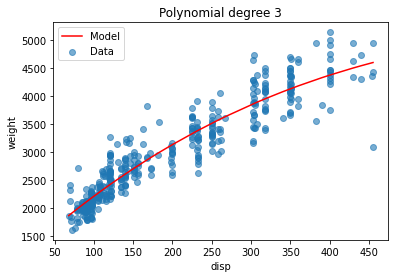

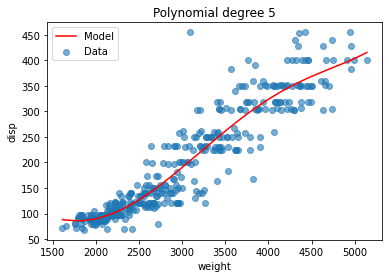

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline, make_pipeline

###
x = np.array(data.mpg)
y = np.array(data.weight)
x_sorted = np.sort(x)

model_1 = make_pipeline(PolynomialFeatures(degree = 3),LinearRegression())

model_1.fit(x.reshape(-1,1),y)
plt.scatter(x, y, alpha = 0.6, label = 'Data')

plt.plot(x_sorted, model_1.predict(x_sorted.reshape(-1,1)), color = 'red', label = 'Model')
plt.title('Polynomial degree 3')
plt.xlabel('mpg'), plt.ylabel('weight')
plt.legend(), plt.show()


###
x = np.array(data.weight)
y = np.array(data.mpg)
x_sorted = np.sort(x)

model_1 = make_pipeline(PolynomialFeatures(degree = 3),LinearRegression())

model_1.fit(x.reshape(-1,1),y)
plt.scatter(x, y, alpha = 0.6, label = 'Data')

plt.plot(x_sorted, model_1.predict(x_sorted.reshape(-1,1)), color = 'red', label = 'Model')
plt.title('Polynomial degree 3')
plt.xlabel('weight'), plt.ylabel('mpg')
plt.legend(), plt.show()


###
x = np.array(mpg_data['displacement'])
y = np.array(data['weight'])
x_sorted = np.sort(x)

model_1 = make_pipeline(PolynomialFeatures(degree = 3),LinearRegression())

model_1.fit(x.reshape(-1,1),y)
plt.scatter(x, y, alpha = 0.6, label = 'Data')

plt.plot(x_sorted, model_1.predict(x_sorted.reshape(-1,1)), color = 'red', label = 'Model')
plt.title('Polynomial degree 3')
plt.xlabel('disp'), plt.ylabel('weight')
plt.legend()
plt.show()


###
x = np.array(data['weight'])
y = np.array(mpg_data['displacement'])
x_sorted = np.sort(x)



model_1 = make_pipeline(PolynomialFeatures(degree = 5),LinearRegression())

model_1.fit(x.reshape(-1,1),y)
plt.scatter(x, y, alpha = 0.6, label = 'Data')

plt.plot(x_sorted, model_1.predict(x_sorted.reshape(-1,1)), color = 'red', label = 'Model')
plt.title('Polynomial degree 5')
plt.xlabel('weight'), plt.ylabel('disp')
plt.legend()
plt.show()

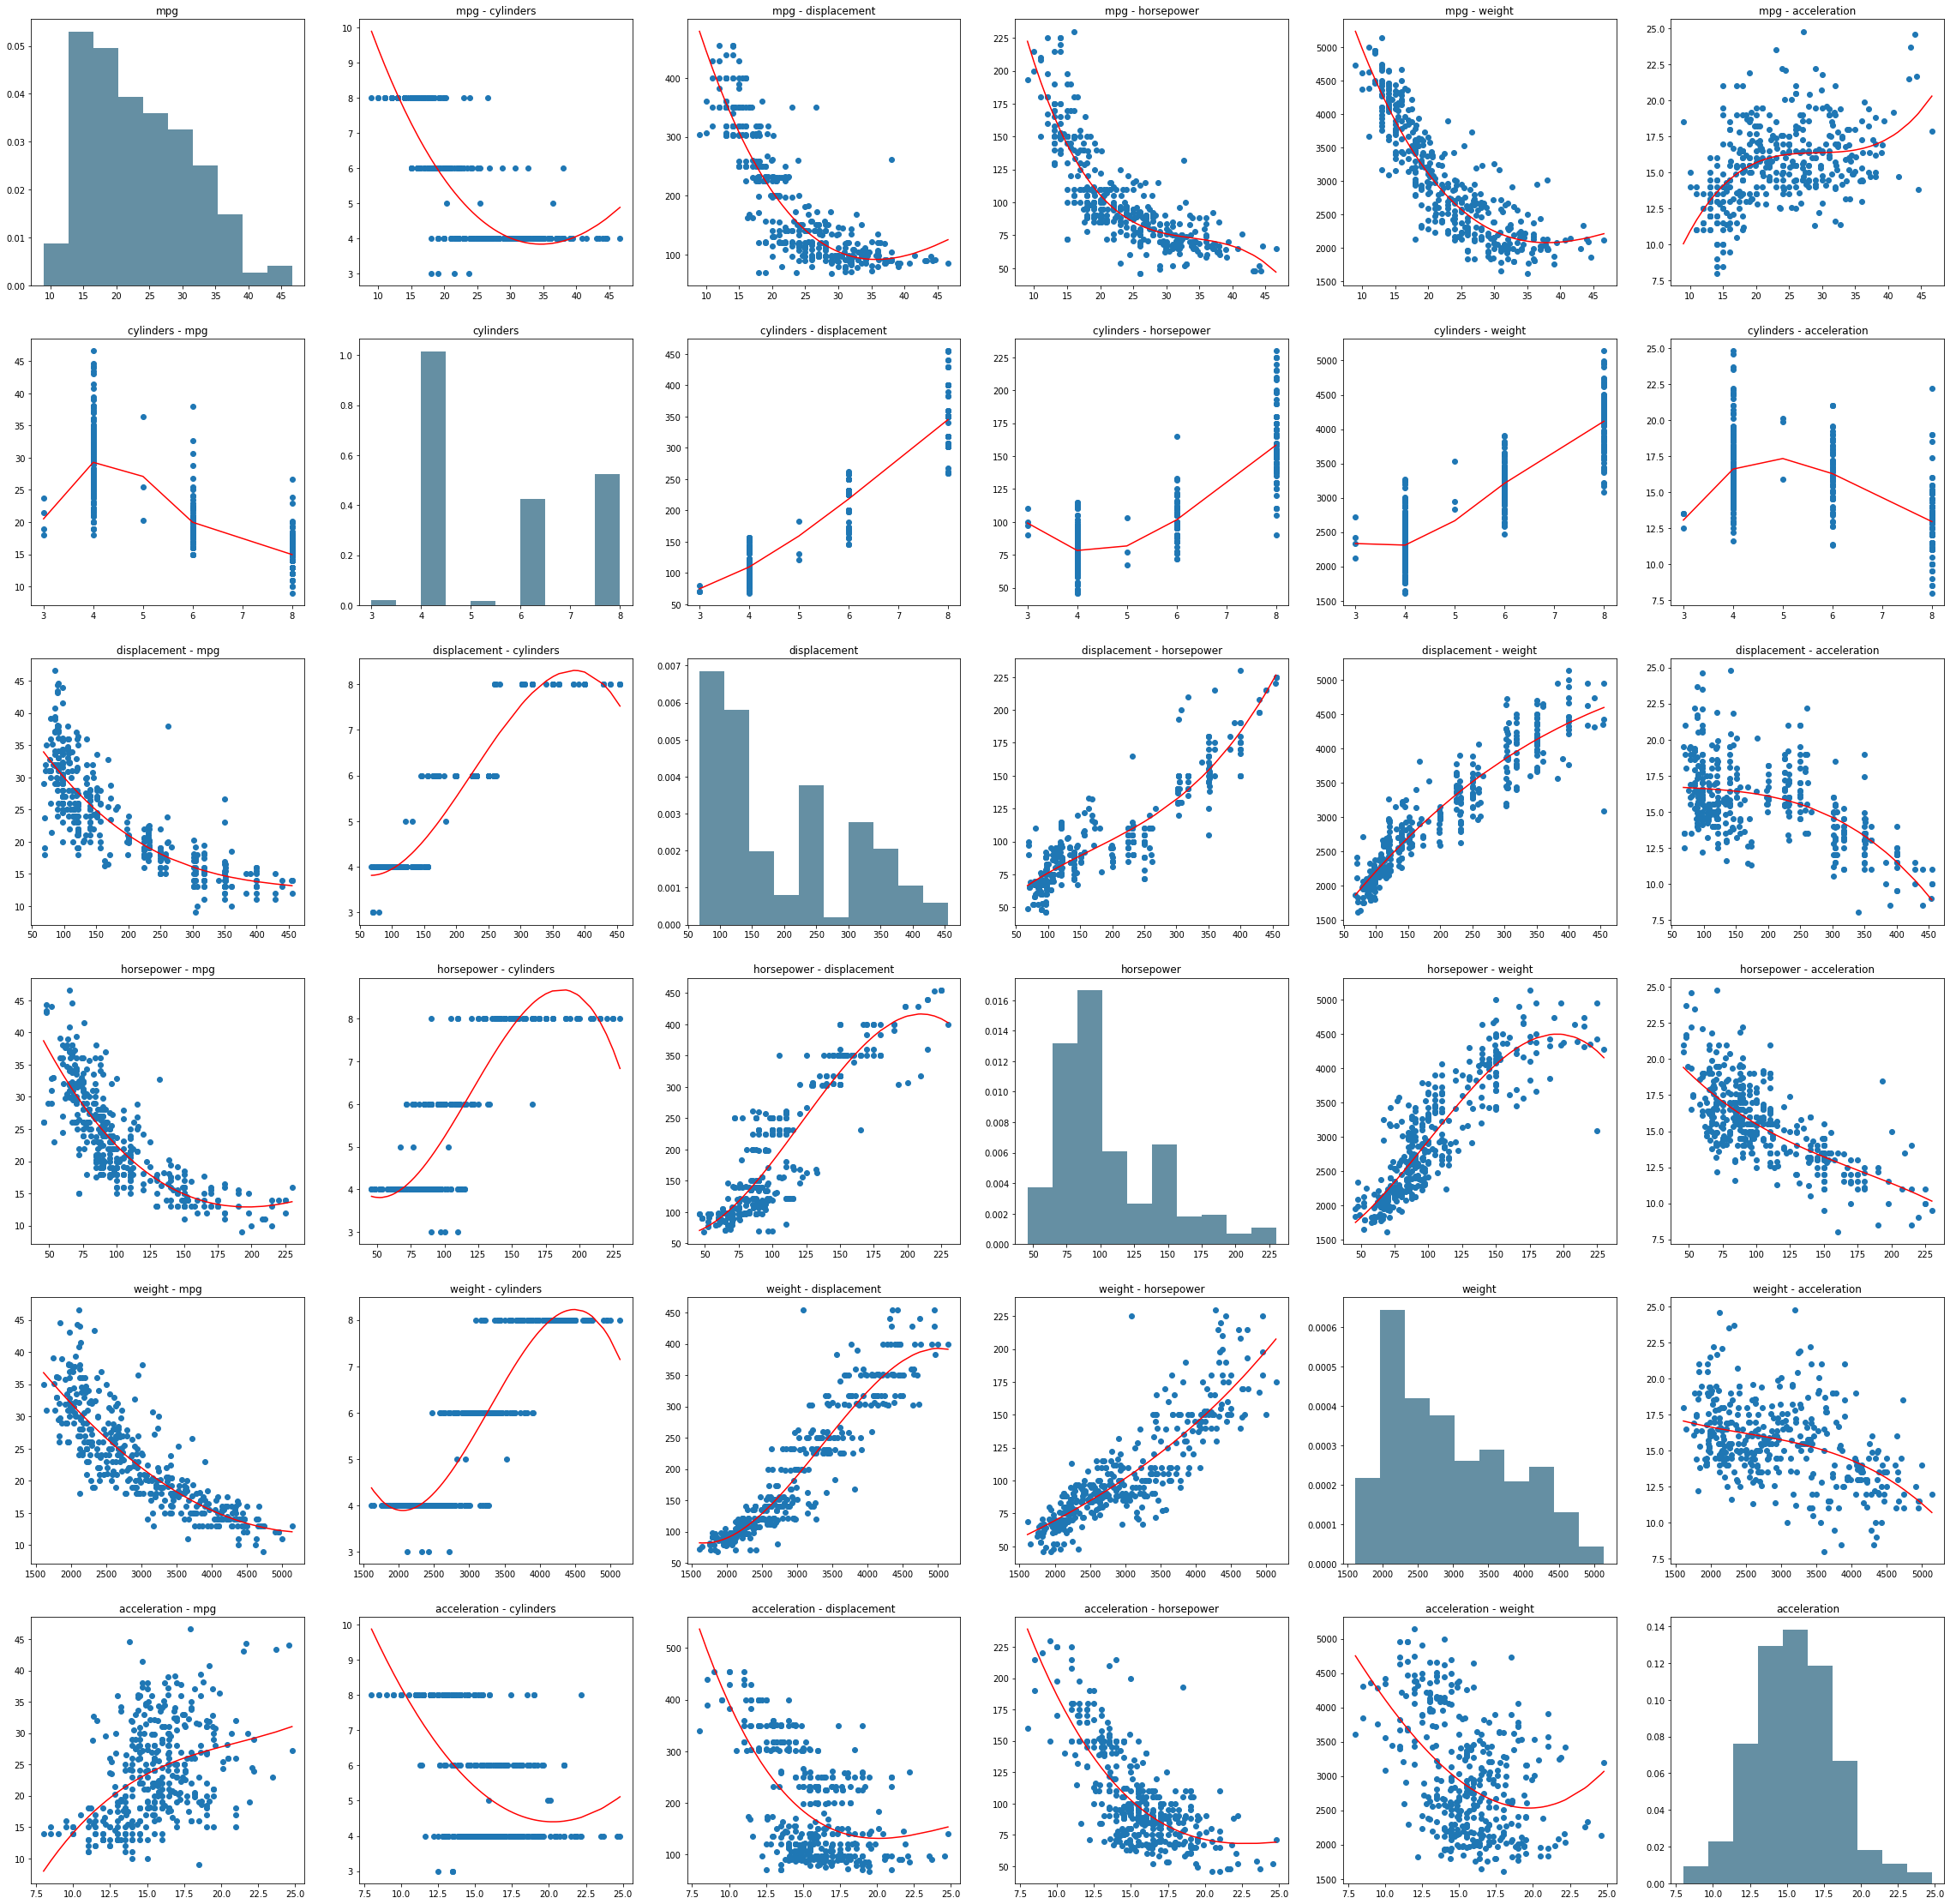

In [ ]:
def k_dim_plot_regress(data, regress = False):
    fig, axs = plt.subplots(len(data.columns), len(data.columns), figsize=(40, 40))

    for column, column_name in enumerate(data.columns):
        for row, row_name in enumerate(data.columns):
            if column == row:
                axs[column, row].hist(data[column_name], density = True, color = '#658fa3')
                axs[column, row].set_title(column_name)
            else:
                axs[column, row].scatter(data[column_name], data[row_name])
                axs[column, row].set_title(column_name + " - " + row_name)
                if (regress):
                    try:
                      x = np.array(data[column_name])
                      y = np.array(data[row_name])
                      x_sorted = np.sort(x)

                      model_1 = make_pipeline(PolynomialFeatures(degree = 3),LinearRegression())

                      model_1.fit(x.reshape(-1,1),y)
                      axs[column, row].plot(x_sorted, model_1.predict(x_sorted.reshape(-1,1)), color = 'red', label = 'Model')
                    except:
                        pass
                        
    plt.show()
    
k_dim_plot_regress(mpg_data, True)